# Практическая работа №2

### Козинова Марина, ММР 211

### Результаты экзаменов в старшей школе

<span style="color:#b405fa">**Цель практической работы**</span>
+ Проанализировать датасет 

<span style="color:blue">***Задачи***</span>
- Ознакомится с датасетом (посмотреть общую статистику, особенности и т.д.)
- Построить гипотезы и подтвердить/опровергнуть их
- Сделать ключевые выводы по анализу датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import math as m
import scipy.stats 

In [178]:
exams = pd.read_csv('Downloads/exams.csv') #читаем датасет

In [3]:
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
print(len(exams))

1000


In [5]:
exams.shape

(1000, 8)

In [6]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Датасет полностью заполнен, пустых значений нет

In [7]:
exams.describe() #общая статистика

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [8]:
exams

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [9]:
exams['parental level of education'].unique() #смотрим, какие есть данные по столбцу уровень образования

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [10]:
exams.iloc[555]

gender                                    female
race/ethnicity                           group D
parental level of education    bachelor's degree
lunch                               free/reduced
test preparation course                     none
math score                                    37
reading score                                 53
writing score                                 48
Name: 555, dtype: object

In [11]:
exams['parental level of education'].value_counts() 

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64

### Чаще всего родители студентов выпускники колледжа. 222

Посмотрим распределение оценок по каждому предмету. 
+ <span style="color:#4040bf">**Синий цвет - математика**</span>
+<span style="color:#cd0074">**Розовый цвет - чтение**</span>
+<span style="color:#FF9B40">**Оранжевый цвет - письмо**</span>

<AxesSubplot:>

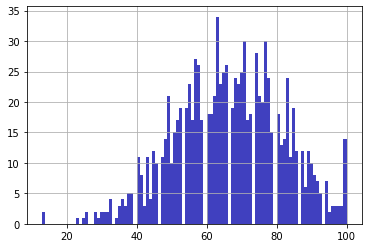

In [12]:
exams['math score'].hist(bins=100, color='#4040bf')

### Больше всего студентов сдают математику 63 балла

<AxesSubplot:>

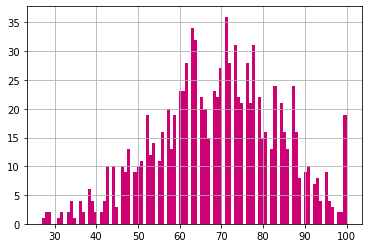

In [13]:
exams['reading score'].hist(bins=100, color='#cd0074')

### Больше всего студентов сдают чтение на 72 балла

<AxesSubplot:>

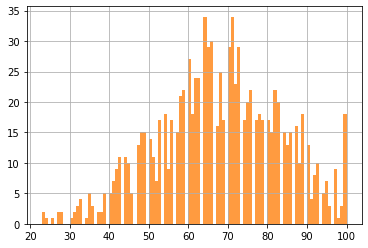

In [14]:
exams['writing score'].hist(bins=100, color='#FF9B40')

### Больше всего студентов сдают письмо на 65 баллов

<span style="color:#3942c6">***Z-оценка***</span>

In [15]:
scipy.stats.zscore(exams['math score'])
#массив z-оценок по математике

0      0.039233
1     -1.714564
2     -0.480410
3      0.688788
4      0.753743
         ...   
995    0.428966
996    1.208431
997   -2.234208
998    0.428966
999   -0.090678
Name: math score, Length: 1000, dtype: float64

In [16]:
exams['z-score math']=scipy.stats.zscore(exams['math score'])
exams.head() #Z-оценка

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z-score math
0,male,group A,high school,standard,completed,67,67,63,0.039233
1,female,group D,some high school,free/reduced,none,40,59,55,-1.714564
2,male,group E,some college,free/reduced,none,59,60,50,-0.480410
3,male,group B,high school,standard,none,77,78,68,0.688788
4,male,group E,associate's degree,standard,completed,78,73,68,0.753743


In [17]:
exams[exams['z-score math'] >2] 
#студенты с z-оценкой по математике больше 2 (тк нет студентов с z-оценкой больше 3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z-score math
10,male,group E,some college,standard,completed,99,83,85,2.117807
39,male,group E,associate's degree,standard,none,98,81,77,2.052852
44,male,group E,high school,standard,none,100,88,87,2.182763
128,male,group E,some college,standard,completed,100,84,87,2.182763
148,female,group E,bachelor's degree,standard,completed,100,100,100,2.182763
224,male,group D,bachelor's degree,standard,none,99,94,97,2.117807
235,male,group C,associate's degree,standard,completed,100,91,90,2.182763
281,male,group E,associate's degree,standard,completed,100,100,100,2.182763
550,female,group E,some college,standard,completed,100,100,100,2.182763
584,male,group C,bachelor's degree,standard,none,100,84,88,2.182763


In [18]:
scipy.stats.zscore(exams['reading score'])
#массив z-оценок по чтению

0     -0.135914
1     -0.679027
2     -0.611138
3      0.610866
4      0.271421
         ...   
995    0.067753
996    1.493425
997   -2.308366
998    0.339310
999   -0.611138
Name: reading score, Length: 1000, dtype: float64

In [19]:
exams['z-score reading']=scipy.stats.zscore(exams['reading score'])
exams.head() #добавляем z-оценку в массив данных

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z-score math,z-score reading
0,male,group A,high school,standard,completed,67,67,63,0.039233,-0.135914
1,female,group D,some high school,free/reduced,none,40,59,55,-1.714564,-0.679027
2,male,group E,some college,free/reduced,none,59,60,50,-0.480410,-0.611138
3,male,group B,high school,standard,none,77,78,68,0.688788,0.610866
4,male,group E,associate's degree,standard,completed,78,73,68,0.753743,0.271421


In [20]:
scipy.stats.zscore(exams['writing score'])
#массив z-оценок по письму

0     -0.303851
1     -0.816895
2     -1.137548
3      0.016802
4      0.016802
         ...   
995   -0.175590
996    1.555936
997   -1.714724
998    0.914630
999   -0.367981
Name: writing score, Length: 1000, dtype: float64

In [21]:
exams['z-score writing']=scipy.stats.zscore(exams['writing score'])
exams.head() #добавляем z-оценку в массив данных

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z-score math,z-score reading,z-score writing
0,male,group A,high school,standard,completed,67,67,63,0.039233,-0.135914,-0.303851
1,female,group D,some high school,free/reduced,none,40,59,55,-1.714564,-0.679027,-0.816895
2,male,group E,some college,free/reduced,none,59,60,50,-0.480410,-0.611138,-1.137548
3,male,group B,high school,standard,none,77,78,68,0.688788,0.610866,0.016802
4,male,group E,associate's degree,standard,completed,78,73,68,0.753743,0.271421,0.016802


In [22]:
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z-score math,z-score reading,z-score writing
0,male,group A,high school,standard,completed,67,67,63,0.039233,-0.135914,-0.303851
1,female,group D,some high school,free/reduced,none,40,59,55,-1.714564,-0.679027,-0.816895
2,male,group E,some college,free/reduced,none,59,60,50,-0.480410,-0.611138,-1.137548
3,male,group B,high school,standard,none,77,78,68,0.688788,0.610866,0.016802
4,male,group E,associate's degree,standard,completed,78,73,68,0.753743,0.271421,0.016802


<AxesSubplot:>

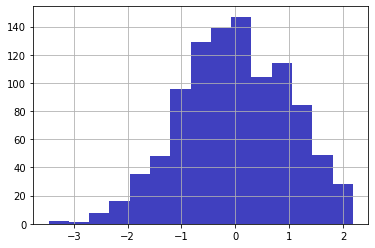

In [23]:
exams['z-score math'].hist(bins=15, color='#4040bf')
#гистограмма z-оценка по математике

In [24]:
exams[exams['z-score math'] < -3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z-score math,z-score reading,z-score writing
392,female,group C,some college,free/reduced,none,13,29,23,-3.468361,-2.715700,-2.869074
832,female,group D,some college,free/reduced,none,13,36,37,-3.468361,-2.240477,-1.971246


In [25]:
exams.groupby('test preparation course')['z-score math'].mean()

test preparation course
completed    0.213740
none        -0.107674
Name: z-score math, dtype: float64

Большинство результатов находится в промежутке [-1;1].
Можно сказать,что распределение нормальное. Есть студенты, которые плохо написали тест (-3 σ) их 2 двое - это студенты женского пола, которые не имели спец подготовки к сдаче теста. Также мы видим, что по чтению и письму у них также есть отклонения влево. Можем сделать вывод, что у студентов низкая успеваемость

<AxesSubplot:>

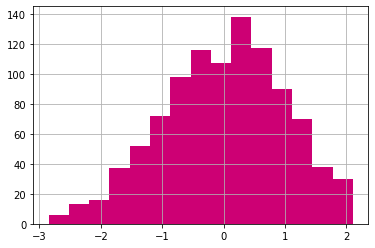

In [26]:
exams['z-score reading'].hist(bins=15, color='#cd0074')
#гистограмма z-оценка по чтению

In [27]:
exams.groupby('test preparation course')['z-score reading'].mean()

test preparation course
completed    0.345389
none        -0.173993
Name: z-score reading, dtype: float64

Здесь также можно сделать вывод о том, что распределение нормальное. 
Большинство результатов находится в промежутке [-1;1], есть студенты, которые чуть хуже сдали тест, но они находятся в пределах 3 σ

<AxesSubplot:>

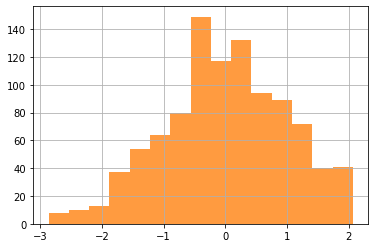

In [28]:
exams['z-score writing'].hist(bins=15, color='#FF9B40')
#гистограмма z-оценка по чтению

In [29]:
exams.groupby('test preparation course')['z-score writing'].mean()

test preparation course
completed    0.444659
none        -0.224001
Name: z-score writing, dtype: float64

Распределение нормальное. Большинство результатов находится в промежутке [-1;1]
Студенты, которые прошли курс по подготовке лучше сдали чтение

**После нахождения z-оценки по каждому тесту (математика, чтение и письмо) можно сделать вывод о том, что все распределения нормальные, так как попадают в интервал [-3 σ; 3 σ]. При этом хотелось бы отметить, что все 3 графика чуть-чуть смещены влево, что говорит о том, студенты скорее чуть хуже нежели чуть лучше сдавали тесты. На результат тестов прямым образом влияло прохождение курса. Студенты, которые прошли специальную подготовку к тестам лучше сдали эти тесты**

<span style="color:#3942c6">***Выбросы***</span>

In [30]:
exams['math score'].describe()

count    1000.000000
mean       66.396000
std        15.402871
min        13.000000
25%        56.000000
50%        66.500000
75%        77.000000
max       100.000000
Name: math score, dtype: float64

In [31]:
q3 = np.percentile(exams['math score'], 75, interpolation = 'midpoint')
q1 = np.percentile(exams['math score'], 25, interpolation = 'midpoint')
print(q3, q1)

77.0 56.0


In [32]:
iqr = q3 - q1
print(iqr)

21.0


In [33]:
iqr_threshold_bottom = q1 - 2.5 * iqr
igr_threshold_top = q3 + 2.5 * iqr
print(iqr_threshold_bottom, igr_threshold_top)

3.5 129.5


Выбрасов нет. Нижний порог ниже минимального значения, верхний порог выше максимального значения

/Users/marinakozinova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


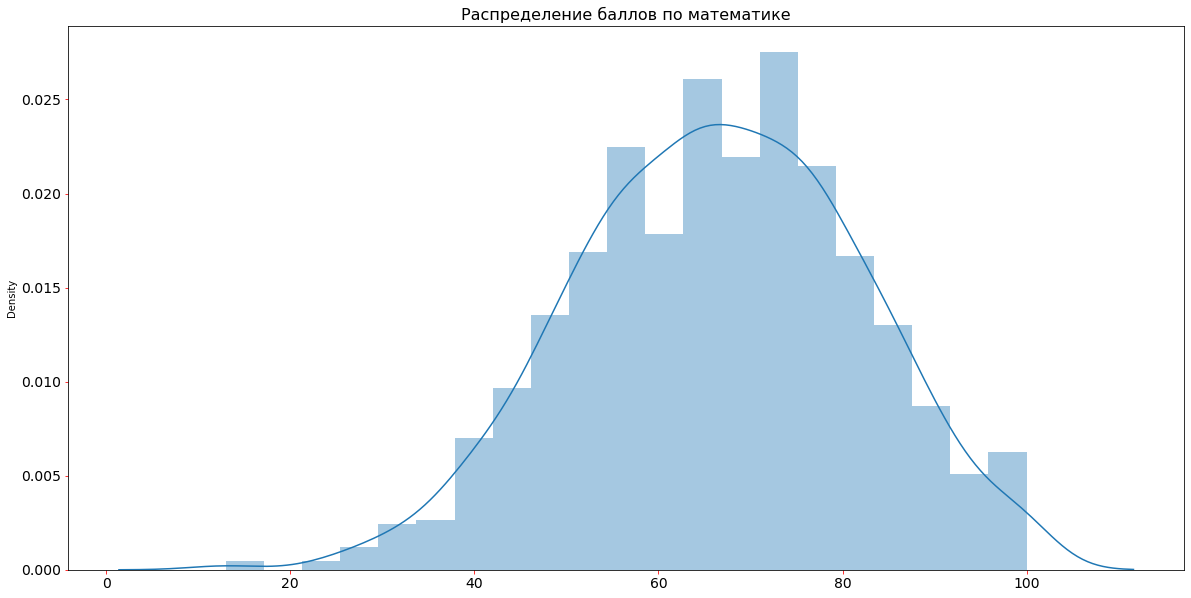

In [34]:
plt.figure(figsize=(20,10))
plt.title("Распределение баллов по математике", fontsize=16)
plt.tick_params(labelsize=14, color = 'r', grid_color = 'b', grid_alpha = 0.5)

sns.distplot(exams['math score'], axlabel=False)

plt.show()



In [35]:
exams['reading score'].describe()

count    1000.000000
mean       69.002000
std        14.737272
min        27.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

In [36]:
q3 = np.percentile(exams['reading score'], 75, interpolation = 'midpoint')
q1 = np.percentile(exams['reading score'], 25, interpolation = 'midpoint')
print(q3, q1)

79.0 60.0


In [37]:
iqr = q3 - q1
print(iqr)

19.0


In [38]:
iqr_threshold_bottom = q1 - 2.5 * iqr
igr_threshold_top = q3 + 2.5 * iqr
print(iqr_threshold_bottom, igr_threshold_top)

12.5 126.5


Выбрасов нет. Нижний порог ниже минимального значения, верхний порог выше максимального значения

/Users/marinakozinova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


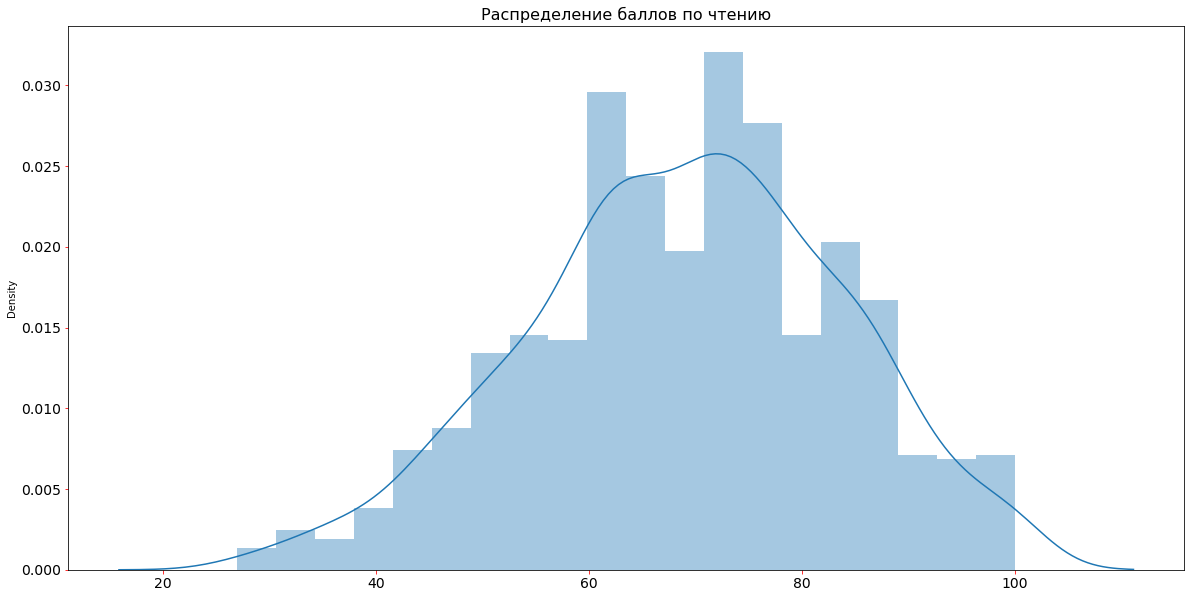

In [187]:
plt.figure(figsize=(20,10))
plt.title("Распределение баллов по чтению", fontsize=16)
plt.tick_params(labelsize=14, color = 'r', grid_color = 'r', grid_alpha = 0.5)

sns.distplot(exams['reading score'], axlabel=False)

plt.show()



In [40]:
exams['writing score'].describe()

count    1000.000000
mean       67.738000
std        15.600985
min        23.000000
25%        58.000000
50%        68.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

In [41]:
q3 = np.percentile(exams['writing score'], 75, interpolation = 'midpoint')
q1 = np.percentile(exams['writing score'], 25, interpolation = 'midpoint')
print(q3, q1)

79.0 58.0


In [42]:
iqr = q3 - q1
print(iqr)

21.0


In [43]:
iqr_threshold_bottom = q1 - 2.5 * iqr
igr_threshold_top = q3 + 2.5 * iqr
print(iqr_threshold_bottom, igr_threshold_top)

5.5 131.5


Выбрасов нет. Нижний порог ниже минимального значения, верхний порог выше максимального значения

/Users/marinakozinova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


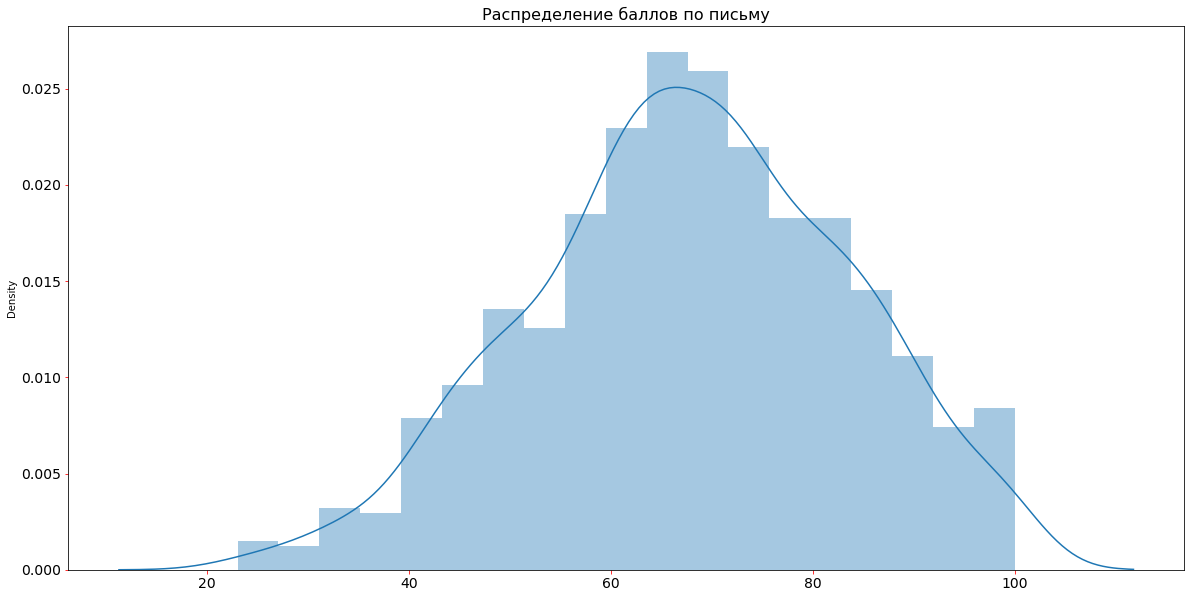

In [44]:
plt.figure(figsize=(20,10))
plt.title("Распределение баллов по письму", fontsize=16)
plt.tick_params(labelsize=14, color = 'r', grid_color = 'b', grid_alpha = 0.5)

sns.distplot(exams['writing score'], axlabel=False)

plt.show()



In [45]:
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z-score math,z-score reading,z-score writing
0,male,group A,high school,standard,completed,67,67,63,0.039233,-0.135914,-0.303851
1,female,group D,some high school,free/reduced,none,40,59,55,-1.714564,-0.679027,-0.816895
2,male,group E,some college,free/reduced,none,59,60,50,-0.480410,-0.611138,-1.137548
3,male,group B,high school,standard,none,77,78,68,0.688788,0.610866,0.016802
4,male,group E,associate's degree,standard,completed,78,73,68,0.753743,0.271421,0.016802


In [46]:
num_features = ['math score', 'reading score', 'writing score', 'z-score', 'z-score math', 'z-score reading', 
                'z-score writing']
cat_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

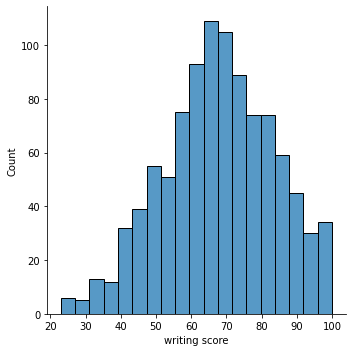

In [47]:
sns.displot(exams['writing score'])


<AxesSubplot:xlabel='writing score', ylabel='gender'>

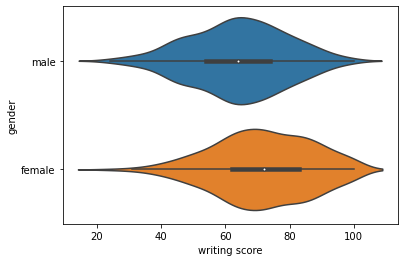

In [48]:
exams.head()
sns.violinplot(x=exams['writing score'], y = exams['gender'])

На скрипичном графике видно, что женщины лучше сдали экзамен по письму. Выборка смещена правее относительно графика по поученным баллам у мужчин

**Гипотезы**

## H.0 Пол студента не влияет на полученный балл за тест по математике
## H.1 Между полом студента и баллом по математике есть связь

<AxesSubplot:>

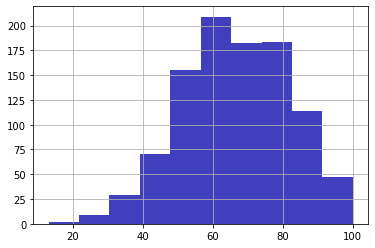

In [188]:
exams['math score'].hist(bins=10, color='#4040bf')
#распределение баллов по математике

In [149]:
def get_math_cat(score):
    if score <= 40:
        return 'bad'
    elif score <= 70:
        return 'good'
    elif score > 70:
        return 'excellent'
    else:
        return score
    #добавляем категорию на основе полученного балла по математике для дальнейшего анализа

In [54]:
exams ['math cat'] = exams['math score'].apply(get_math_cat)
#добавляю столбец с категорией

In [55]:
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z-score math,z-score reading,z-score writing,math cat
0,male,group A,high school,standard,completed,67,67,63,0.039233,-0.135914,-0.303851,good
1,female,group D,some high school,free/reduced,none,40,59,55,-1.714564,-0.679027,-0.816895,bad
2,male,group E,some college,free/reduced,none,59,60,50,-0.480410,-0.611138,-1.137548,good
3,male,group B,high school,standard,none,77,78,68,0.688788,0.610866,0.016802,excellent
4,male,group E,associate's degree,standard,completed,78,73,68,0.753743,0.271421,0.016802,excellent


In [56]:
exams ['math cat'] = pd.Categorical(exams['math cat']) 
exams ['gender'] = pd.Categorical(exams['gender']) 
exams ['test preparation course'] = pd.Categorical(exams['test preparation course']) 
#перекодировка колонки в категориальную переменную

In [57]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   object  
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   category
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
 8   z-score math                 1000 non-null   float64 
 9   z-score reading              1000 non-null   float64 
 10  z-score writing              1000 non-null   float64 
 11  math cat                     1000 non-null   category
dtypes: category(3), float64(3), int64(3), object(3)
memory usage: 7

In [58]:
exams ['math cat']

0           good
1            bad
2           good
3      excellent
4      excellent
         ...    
995    excellent
996    excellent
997          bad
998    excellent
999         good
Name: math cat, Length: 1000, dtype: category
Categories (3, object): ['bad', 'excellent', 'good']

In [148]:
ct_o = exams.groupby('gender')['math cat'].value_counts().unstack()
ct_o

,good,excellent,bad
gender,,,
female,287,159,37
male,253,250,14


In [114]:
alpha = 0.01
dof = (2-1)*(3-1)
print(dof)
critical_value = 9.2

2


In [112]:
n_total = ct_o.sum().sum()
print(n_total)

1000


In [117]:
n_target_good = 540
n_target_excellent = 409
n_target_bad = 51
print(n_target_good, n_target_excellent, n_target_bad)

540 409 51


In [122]:
p_target_0 = n_target_good / n_total
p_target_1 = n_target_excellent / n_total
p_target_2 = n_target_bad / n_total
print(p_target_0,p_target_1, p_target_3)

0.54 0.409 0.051


In [123]:
n_female = 483
n_male = 517
print(n_female,n_male )

483 517


In [124]:
f_e_target_good_female = n_female * p_target_0
f_e_target_excellent_female = n_female * p_target_1
f_e_target_bad_female = n_female * p_target_2
print (f_e_target_good_female, f_e_target_excellent_female, f_e_target_bad_female)

260.82 197.547 24.633


In [125]:
f_e_target_good_male = n_male * p_target_0f
f_e_target_excellent_male = n_male * p_target_1
f_e_target_bad_male = n_male * p_target_2
print (f_e_target_good_male, f_e_target_excellent_male, f_e_target_bad_male)

279.18 211.45299999999997 26.366999999999997


In [137]:
ct_e = np.array([[f_e_target_good_female, f_e_target_excellent_female, f_e_target_bad_female],
               [f_e_target_good_male, f_e_target_excellent_male ,f_e_target_bad_male]])

print(ct_e)

[[260.82  197.547  24.633]
 [279.18  211.453  26.367]]


In [141]:
chi_square = ((ct_o - ct_e)**2 / ct_e).sum().sum()

In [142]:
print (chi_square, critical_value)
print (chi_square > critical_value)

31.640810302339275 9.2
True


__Критерий больше критического значения. Следовательно, мы отвергаем H0, т.к. между полом и оценкой по математике есть связь__

In [146]:
scipy.stats.chi2_contingency(ct_o, correction = False)

(31.64081030233927,
 1.346744905537445e-07,
 2,
 array([[260.82 , 197.547,  24.633],
        [279.18 , 211.453,  26.367]]))

In [144]:
ct_e

array([[260.82 , 197.547,  24.633],
       [279.18 , 211.453,  26.367]])

Проверка расчета с помощью спец функии

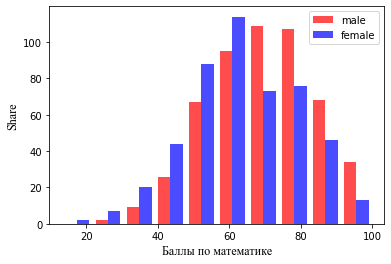

In [147]:
plt.hist([exams[exams.gender == i]['math score'] for i in exams.gender.unique()],\
        alpha = 0.7, color = ['r', 'b'], label = exams.gender.unique())
plt.xlabel('Баллы по математике', fontname = 'Times New Roman', fontsize = 12)
plt.ylabel('Share', fontname = 'Times New Roman', fontsize = 12)
plt.legend(loc = 'upper right')
plt.show()

График отражает, что женщины хуже мужчин сдали математику, что подтверждает гипотезу о том, что между полом и полученной оценкой по математике есть связь

In [61]:
from scipy.stats import chi2_contingency

**Линейная регрессия**

In [62]:
exams_new = exams.copy()

In [63]:
exams_new.drop(columns = ['z-score math', 'z-score reading', 'z-score writing'], axis = 1, inplace=True) 

In [64]:
exams_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math cat
0,male,group A,high school,standard,completed,67,67,63,good
1,female,group D,some high school,free/reduced,none,40,59,55,bad
2,male,group E,some college,free/reduced,none,59,60,50,good
3,male,group B,high school,standard,none,77,78,68,excellent
4,male,group E,associate's degree,standard,completed,78,73,68,excellent


In [65]:
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z-score math,z-score reading,z-score writing,math cat
0,male,group A,high school,standard,completed,67,67,63,0.039233,-0.135914,-0.303851,good
1,female,group D,some high school,free/reduced,none,40,59,55,-1.714564,-0.679027,-0.816895,bad
2,male,group E,some college,free/reduced,none,59,60,50,-0.480410,-0.611138,-1.137548,good
3,male,group B,high school,standard,none,77,78,68,0.688788,0.610866,0.016802,excellent
4,male,group E,associate's degree,standard,completed,78,73,68,0.753743,0.271421,0.016802,excellent


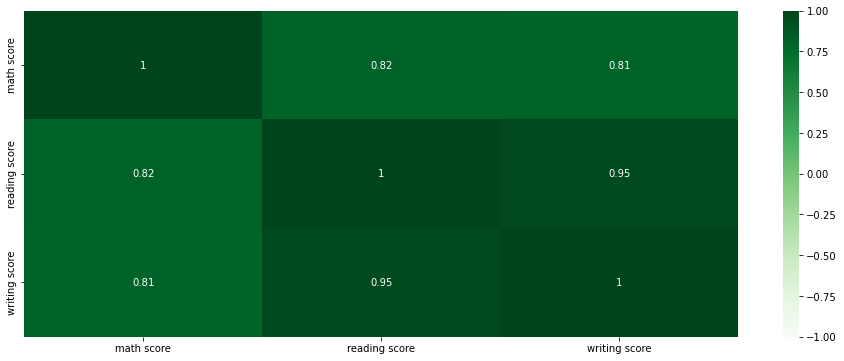

In [190]:
# Проверка на мультиколлинеарность
plt.figure(figsize = (16,6))
h_m = sns.heatmap(exams_new.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'Greens')

Корреляция достаточно сильная между письмом и чтением (т.е чем выше балл за письмо тем выше балл за чтение, что логично)

In [67]:
import statsmodels.api as sm
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt

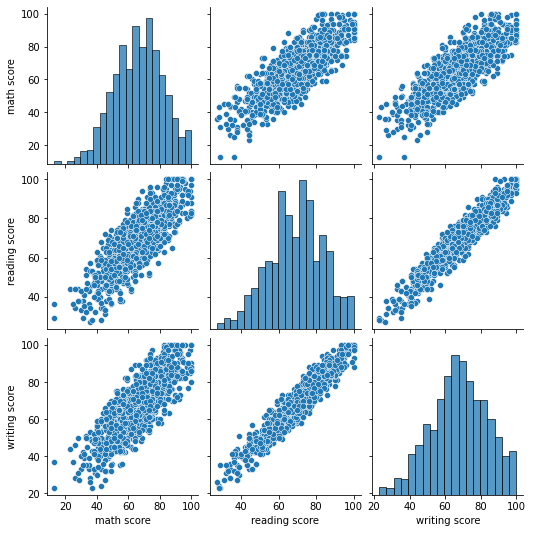

In [68]:
sns.pairplot(exams_new)

На графиках можем наблюдать линейную зависимость между баллами по математике, чтению и письму

In [69]:
X = exams_new['writing score']
y = exams_new['reading score']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=0.9014431725920146, intercept=7.940042374962111, rvalue=0.954274434456684, pvalue=0.0, stderr=0.00893865370160617, intercept_stderr=0.6213222116922698)


In [70]:
#коэффициент детерминации 
r_sq = res.rvalue ** 2
print (r_sq)

0.9106396962576241


Высокое значение, модель на 91% объясняет дисперсию в целевой переменной

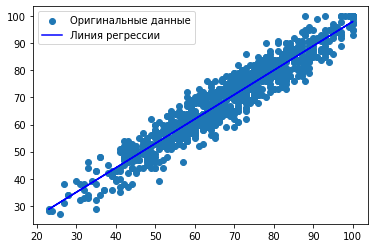

In [71]:
plt.scatter(X, y, label = 'Оригинальные данные')
plt.plot(X, res.intercept + res.slope * X, 'b', label = 'Линия регрессии')
plt.legend()
plt.show()

In [72]:
X_last = exams_new['writing score']
y = exams_new['reading score']
X_last_constant = sm.add_constant(X_last)

model = sm.OLS(y, X_last_constant)
res_simple = model.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:          reading score   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:25:42   Log-Likelihood:                -2901.3
No. Observations:                1000   AIC:                             5807.
Df Residuals:                     998   BIC:                             5816.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.9400      0.621     12.779

Чем выше балл за письмо, тем выше балл за чтение


**Логистическая регрессия**

## H0. По совокупности таких параметров как пол, образование родителей, ланч  нельзя предсказать баллы по математике
## H1. По совокупности таких параметров как пол, образование родителей, ланч можно предсказать баллы по математике

In [91]:
logreg = exams_new.copy()
logreg['math pass'] = logreg['math score'].apply(lambda x: True if x >=50 else False)
logreg = logreg.drop(columns=['math score','math cat'])    
data = pd.get_dummies(logreg, columns =['lunch','reading score','writing score','gender', 'race/ethnicity', 'parental level of education', 'test preparation course'])
X = data.iloc[:,1:]
Y = data.iloc[:,0]

Если студент набрал на экзмене больше 50 баллов, зачит он сдал, если меньше, значит не сдал.
Оставляем только math pass, чтобы не было 100% предсказания 
Разворачиваем таблицу по данным
y - только первый столбец (данные для обучения), x - остальные столбцы (данные по котором можно предсказывать и обучать)

In [92]:
data.head()

,math pass,lunch_free/reduced,lunch_standard,reading score_27,reading score_28,reading score_29,reading score_31,reading score_32,reading score_33,reading score_34,...,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_completed,test preparation course_none
0,True,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,False,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,True,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,True,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,True,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


Смотрим получившуюся таблицу

In [93]:
classifier = LogisticRegression(solver='lbfgs',random_state=0)
classifier.fit(X, Y)
predicted_y = classifier.predict(X)

Объявили лог регрессию, обучили на данных x,y. Пытаемся предсказать данные y по обученной машинному обучению (формуле лог регрессии)

In [94]:
for x in range(len(predicted_y)):
   if (predicted_y[x] == 0):
      print(x, end="\t")

1	9	18	23	24	29	32	51	53	67	81	84	97	109	111	113	123	138	149	155	175	181	191	195	222	226	232	246	261	278	283	284	300	301	337	348	377	391	392	419	448	461	462	479	492	496	504	507	532	548	556	574	579	597	598	600	621	644	649	672	681	700	712	717	719	720	729	734	746	775	776	779	795	810	829	830	832	870	875	885	899	908	936	937	938	948	962	968	976	978	980	997	

Сколько студентов завалили тест согласно модели predict (проверка)

In [95]:
print('Accuracy: {:.2f}'.format(classifier.score(X, Y)))

Accuracy: 0.93


__Так как точность модели 93%, можно сказать, что по параметрам из таблицы (пол, образование родителей, ланч и прохождение курса) можно предскзать данные. Соответственно H0 отвергается, а H1 подтверждается__

Линейная регрессия

In [106]:
linreg = exams_new.copy()
linreg = linreg.drop(columns=['math cat'])   
data_lin = pd.get_dummies(linreg, columns =['lunch','reading score','writing score','gender', 'race/ethnicity', 'parental level of education', 'test preparation course'])
X = data_lin.iloc[:,1:]
Y = data_lin.iloc[:,0]
model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
for x in range(len(y_pred)):
     print(int(y_pred[x]), exams.loc[x]['math score'])
model.score(X, Y)

63 67
41 40
62 59
79 77
79 78
70 63
51 62
91 93
71 63
47 47
89 99
80 80
84 77
73 74
90 81
66 69
54 58
55 54
32 23
37 39
83 83
60 58
73 71
44 44
51 46
50 51
55 53
73 71
75 74
40 33
80 87
73 78
41 40
60 65
74 79
64 68
64 57
62 67
53 58
89 98
63 54
67 77
87 87
62 58
100 100
55 60
62 64
72 65
64 68
58 60
68 65
52 52
76 74
41 36
51 57
53 56
69 67
86 88
40 42
63 68
69 76
60 58
69 69
79 77
92 83
54 49
68 71
39 47
70 79
56 60
57 56
54 57
57 49
70 79
70 71
66 71
54 47
74 72
81 78
52 54
52 46
37 31
48 51
76 78
32 32
60 53
58 63
96 97
52 56
81 72
50 57
76 74
79 81
90 94
73 81
54 58
95 95
54 45
57 63
59 60
59 54
78 75
86 79
69 66
54 47
71 70
76 82
53 56
79 92
35 30
74 79
41 41
68 63
38 43
80 77
77 76
55 49
57 59
65 59
76 76
62 55
74 78
49 51
36 41
74 74
63 62
70 77
53 45
93 100
83 83
71 77
67 66
65 65
61 62
66 55
70 73
81 73
57 48
46 52
54 60
62 68
71 65
79 86
56 55
71 80
50 51
54 63
61 60
94 100
45 46
66 67
50 54
69 63
73 68
50 54
35 43
65 64
83 92
78 82
85 84
87 84
67 65
82 83
65 70
70 66
76 71


0.8905228020273508

In [107]:
model.score(X, Y)

0.8905228020273508

__Строим и выводим предсказанные баллы по математике
В левой колонке - реальные баллые по математике
В правой колонке - предсказанные баллы по математике. Можно сделать вывод о том, что модель действительно предсказывает быллы, точность модели 89%__

In [98]:
exams_new["gender"].value_counts()

male      517
female    483
Name: gender, dtype: int64

In [81]:
data_lin.head()

,math score,lunch_free/reduced,lunch_standard,reading score_27,reading score_28,reading score_29,reading score_31,reading score_32,reading score_33,reading score_34,...,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_completed,test preparation course_none
0,67,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,40,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,59,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,77,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,78,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


Сводная таблица - отличный инструмент, чтобы структуризировать необходимую информацию по несколькм признакам

In [152]:
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z-score math,z-score reading,z-score writing,math cat
0,male,group A,high school,standard,completed,67,67,63,0.039233,-0.135914,-0.303851,good
1,female,group D,some high school,free/reduced,none,40,59,55,-1.714564,-0.679027,-0.816895,bad
2,male,group E,some college,free/reduced,none,59,60,50,-0.480410,-0.611138,-1.137548,good
3,male,group B,high school,standard,none,77,78,68,0.688788,0.610866,0.016802,excellent
4,male,group E,associate's degree,standard,completed,78,73,68,0.753743,0.271421,0.016802,excellent


In [154]:
pd.pivot_table(exams,
               index=['gender', 'test preparation course', 'parental level of education'])

math score  \
gender test preparation course parental level of education               
female completed               associate's degree            68.703704   
                               bachelor's degree             69.047619   
                               high school                   65.571429   
                               master's degree               79.833333   
                               some college                  62.810811   
                               some high school              60.571429   
       none                    associate's degree            66.055556   
                               bachelor's degree             66.378378   
                               high school                   60.378788   
                               master's degree               68.133333   
                               some college                  61.873016   
                               some high school              55.219178   
male   completed               associate's degree            74.520833   
                               bachelor's degree             82.055556   
                               high school                   71.413793   
                               master's degree               80.428571   
                               some college                  73.288889   
                               some high school              64.857143   
       none                    associate's degree            69.148649   
                               bachelor's degree             72.888889   
                               high school                   66.835443   
                               master's degree               68.857143   
                               some college                  64.623377   
                               some high school              65.945455   

                                                            reading score  \
gender test preparation course parental level of education                  
female completed               associate's degree               77.888889   
                               bachelor's degree                79.809524   
                               high school                      75.250000   
                               master's degree                  86.916667   
                               some college                     74.081081   
                               some high school                 70.885714   
       none                    associate's degree               72.740741   
                               bachelor's degree                74.216216   
                               high school                      68.060606   
                               master's degree                  76.766667   
                               some college                     70.253968   
                               some high school                 64.054795   
male   completed               associate's degree               74.229167   
                               bachelor's degree                80.555556   
                               high school                      71.172414   
                               master's degree                  78.714286   
                               some college                     72.488889   
                               some high school                 63.535714   
       none                    associate's degree               65.081081   
                               bachelor's degree                67.138889   
                               high school                      62.683544   
                               master's degree                  65.857143   
                               some college                     60.740260   
                               some high school                 61.200000   

                                                            writing score  \
gender test preparation course parental level of educat

In [158]:
pd.pivot_table(exams,
               index=['gender', 'test preparation course'],
values=["math score"],
               aggfunc=[np.mean, len])

mean        len
                               math score math score
gender test preparation course                      
female completed                65.893750        160
       none                     61.860681        323
male   completed                73.154286        175
       none                     67.456140        342

- 160 студентов женского пола, которые прошли продготовительный курс
- 323 студента женского пола, которые не прошли подготовительный курс
- 175 студентов мужского пола, которые прошли подготовительный курс
- 342 студента мужского пола, которые не прошли подготовительный курс

<span style="color:#b405fa">**Проведенный анализ по датасету показал следующие выводы**</span>


<span style="color:blue">***Выводы***</span>
- Распределения по всем трем предметам (математика, чтение и письмо) нормальные
- Пол студента влияет на балл по математике
- Экзамены письмо и чтение имеют высокую корреляцию
- По совокупности ключевых факторов (пол, образование родителей, бесплатный ланч и прохождение курса) можно построить предикторную модель с точностью 89%